In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("white")

In [205]:
df_sea_ice = pd.read_csv('sea_ice_data.csv')

In [206]:
df_sea_ice.head()

,Hemisphere,Month,Day,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NH,January,1,14.2610,14.3190,13.6340,14.0690,14.0350,14.0950,14.1450,13.8040,13.6570,14.0250,13.8230,13.4420,13.4790,13.5900,13.6470,13.5020,13.1600,13.1600,13.1100,13.2060,13.1890,13.2050,12.8960,13.3530,12.9590,13.0110,13.0730,12.7210,12.6430,12.4840,12.9340,13.0460,12.7110,13.3020,12.7340
1,NH,January,2,14.3130,14.3840,13.8310,14.0920,14.1410,14.1100,14.2580,13.8180,13.8010,14.0970,13.8860,13.5390,13.3850,13.6280,13.6980,13.5380,13.1630,13.2100,13.2070,13.1640,13.1800,13.2320,12.9150,13.4210,12.9610,13.1030,13.1250,12.8060,12.6440,12.6000,12.9920,13.0720,12.7100,13.4380,12.7240
2,NH,January,3,14.4020,14.2830,13.8470,14.1410,14.2500,14.0420,14.3350,13.7860,13.8370,14.2620,13.8840,13.6300,13.4180,13.5980,13.8760,13.5020,13.2930,13.2670,13.1820,13.1900,13.2670,13.2540,12.9260,13.3790,13.0120,13.1160,13.1120,12.7900,12.7130,12.6340,12.9800,13.1700,12.7990,13.4110,12.7170
3,NH,January,4,14.4170,14.3210,13.8580,14.0720,14.2550,14.1680,14.2880,13.7910,13.8640,14.2770,13.9130,13.6570,13.5100,13.6230,13.9250,13.5900,13.3130,13.3070,13.2520,13.2750,13.2860,13.2360,13.0510,13.4140,13.0450,13.2190,13.0510,12.8290,12.9540,12.7240,13.0450,13.1930,12.8340,13.4360,12.7860
4,NH,January,5,14.3810,14.3030,13.8720,14.1850,14.2660,14.2310,14.3040,13.8390,14.0160,14.2170,13.8900,13.6780,13.5660,13.6830,14.0360,13.6170,13.3830,13.3140,13.3610,13.3030,13.3520,13.3370,13.1760,13.4170,13.0650,13.1480,13.1150,12.8740,12.9560,12.8340,13.1470,13.1660,12.8620,13.4770,12.8410


## Apply transformations to get data in a usable format

As you can see from the output above, the data-set contains observations of sea ice coverage measured in km\squared by day for each year since 1989.<br>
The data is in a wide format which makes it difficult to analyze. Let's transform the data into a more usable format:

In [207]:
# In this command we will convert the dataframe from wide to long
# The columns containing the observations by year will be flattended into one column, now called 'Extent'
df_sea_ice_t = pd.melt(df_sea_ice, 
                       id_vars = ['Hemisphere', 'Month', 'Day'], 
                       var_name = 'Year',
                       value_name='Extent', 
                       value_vars = ['1989', '1990', '1991', '1992', '1993',
                                   '1994', '1995', '1996', '1997', '1998',
                                   '1999', '2000', '2001', '2002','2003', 
                                   '2004', '2005', '2006', '2007', '2008',
                                   '2009', '2010', '2011', '2012', '2013', 
                                   '2014', '2015', '2016', '2017', '2018', 
                                   '2019', '2020', '2021', '2022']
                      )

# Let's also set the Month column to an ordered categorical variable so it's easier to analyze:
df_sea_ice_t['Month'] = df_sea_ice_t['Month'].astype("category")
df_sea_ice_t['Month'] = df_sea_ice_t['Month'].cat.set_categories(['January', 'February', 'March', 
                                                                  'April', 'May', 'June', 'July',
                                                                  'August', 'September', 'October', 
                                                                  'November', 'December'], ordered=True)

The data is in a much more usable format now.

In [208]:
df_sea_ice_t.head()

,Hemisphere,Month,Day,Year,Extent
0,NH,January,1,1989,14.2610
1,NH,January,2,1989,14.3130
2,NH,January,3,1989,14.4020
3,NH,January,4,1989,14.4170
4,NH,January,5,1989,14.3810


## Check sea ice extent trends over time

Let's look at the average monthly Extent by year and plot that out over time:

In [209]:
# Let's first create a dataframe containing these average values by Hemisphere
df_avgs = df_sea_ice_t.groupby(['Hemisphere', 
                                'Year', 
                                'Month']).agg(avg_extent = ('Extent','mean')).reset_index()

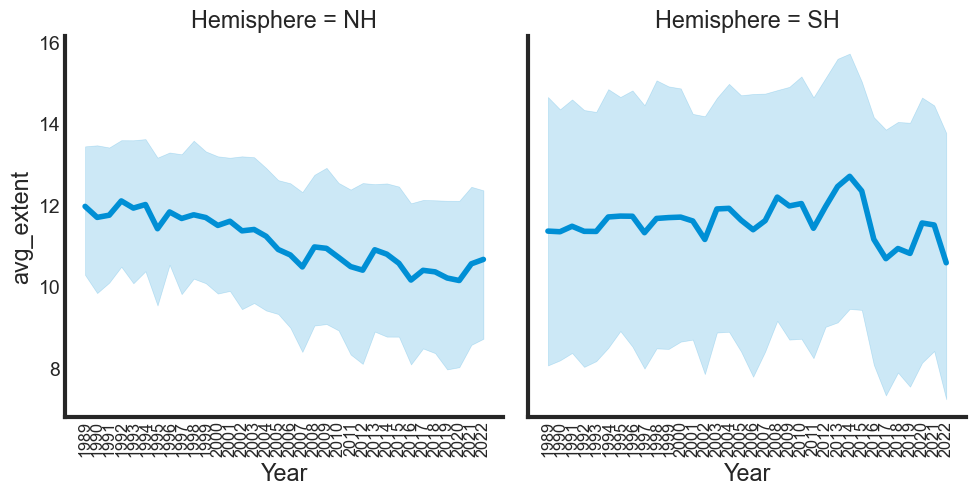

In [210]:
g = sns.relplot(data=df_avgs, x="Year", y="avg_extent", col="Hemisphere", kind="line")
g.tight_layout()
g.set_xticklabels(rotation=90, size='small')

Based on this plot, it seems like average extent is decreasing over time. For each month we're seeing the average extent represented by the solid blue line, and a range for the min/max extent, represented by the shaded area. Notice how the min extent has been dropping pretty consistently over time. The effect seems to be a bit more pronounced for the Northern Hemisphere.<br><br>
This is a useful plot, but let's repeat this plot for each month individually:

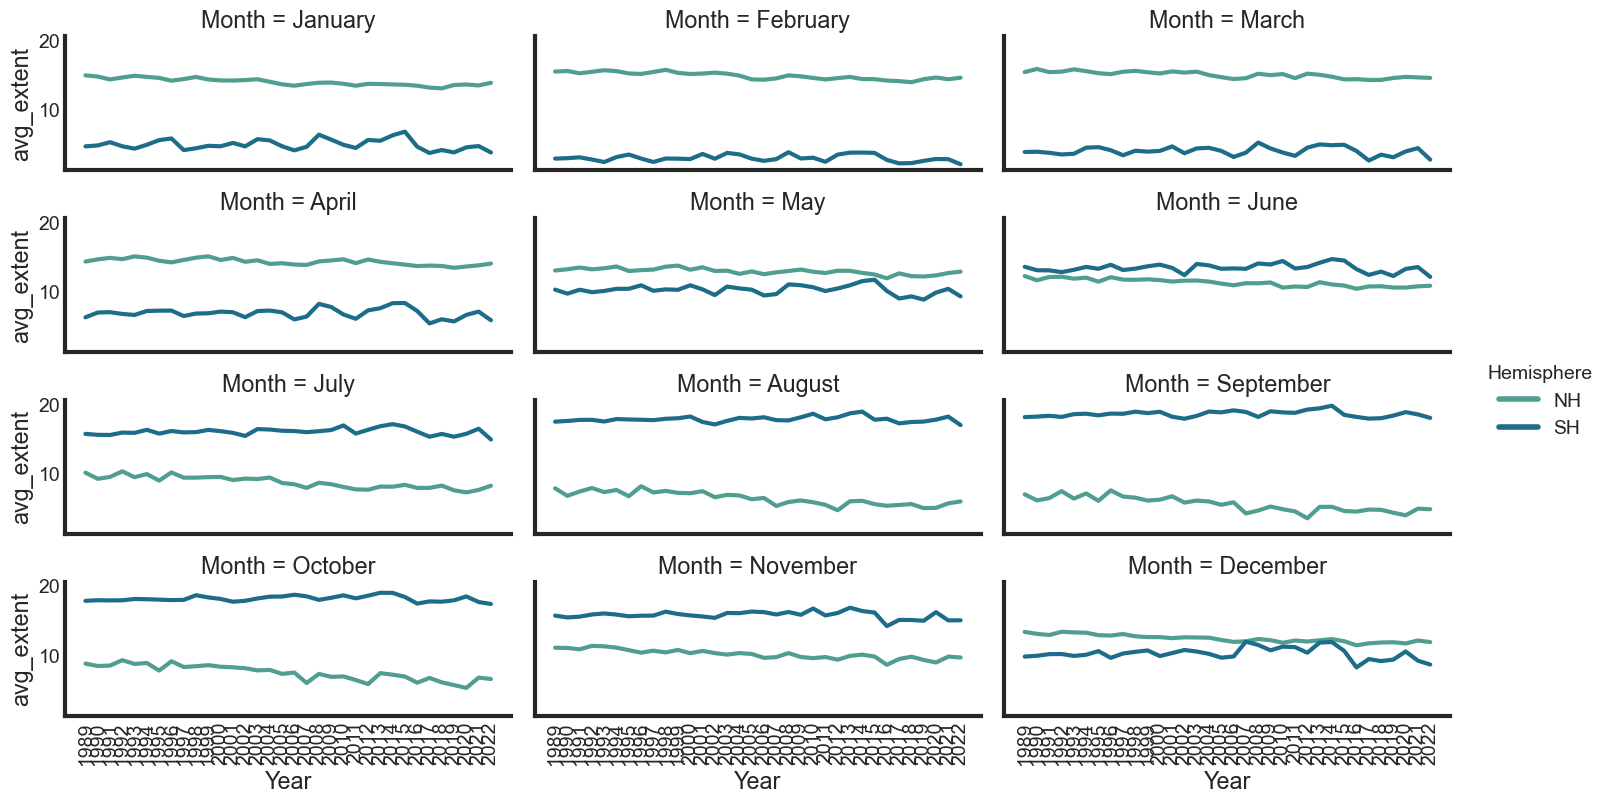

In [211]:
g = sns.relplot(
    data=df_avgs,
    x="Year", y="avg_extent", col="Month", hue ="Hemisphere",
    kind="line", palette="crest", linewidth=3, zorder=5,
    col_wrap=3, height=2, aspect=2.5, legend=True
)

g.tight_layout()
g.set_xticklabels(rotation=90)

These plots are helpful, but it's hard to get an idea of which months are influencing the drop in sea ice extent. Most of the plots exhibit a seemingly flat or downard trend, but it's hard to quantify the trend just by looking at the plot.

## Generating a linear regression model for each trend line to gauge effect

In [212]:
# First we'll try to do a fit on just one month and one hemisphere
df_lm_src = df_avgs[(df_avgs['Month']=='October') & (df_avgs['Hemisphere']=='NH')]

In [213]:
# Creating X and y
X = df_lm_src['Year'].astype('float')
y = df_lm_src['avg_extent']

In [214]:
# Adding a constant to get an intercept
x_sm = sm.add_constant(X)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y, x_sm).fit()

# Printing the parameters
print('Slope: ', lr.params[1], ' p-value: ', lr.pvalues[1])


Slope:  -0.09584900071465682  p-value:  8.056112869897188e-12


We can write a loop that goes through all of the months for each Hemisphere and performs this calculation. Then we can observe the slope of each regression line and the p-value to determine which months are having the largest effect on the drop in sea ice extent.

In [215]:
# Add the months to a list object
months = []
months = df_avgs['Month'].unique()

# Add the Hemispheres to a list object
hemispheres = ['NH', 'SH']

Now we are ready to loop through them all:

In [216]:
# Let's also store the results in lists so we can do some visualization:
l_hemispheres = []
l_months = []
l_slope = []
l_p_values = []

for hemisphere in hemispheres:
    for month in months:
        df_lm_src = df_avgs[(df_avgs['Month']==month) & (df_avgs['Hemisphere']==hemisphere)]
        
        # Creating X and y
        X = df_lm_src['Year'].astype('float')
        y = df_lm_src['avg_extent']
        
        # Adding a constant to get an intercept
        x_sm = sm.add_constant(X)

        # Fitting the resgression line using 'OLS'
        lr = sm.OLS(y, x_sm).fit()

        # Printing the parameters
        # print('Hemisphere/Month:',hemisphere,'/',month, 'Slope: ', lr.params[1], ' p-value: ', lr.pvalues[1])
        
        l_hemispheres.append(hemisphere)
        l_months.append(month)
        l_slope.append(lr.params[1])
        l_p_values.append(lr.pvalues[1])
        
df_fit_params = pd.DataFrame(
                    {'hemisphere': l_hemispheres,
                     'month': l_months,
                     'slope': l_slope,
                     'p_value': l_p_values
                    })


Instead of printing out each result, we now have them all in a dataframe:

In [217]:
df_fit_params.sample(5)

,hemisphere,month,slope,p_value
7,NH,August,-0.0815,0.0000
19,SH,August,0.0048,0.5168
16,SH,May,-0.0088,0.4491
3,NH,April,-0.0333,0.0000
5,NH,June,-0.0480,0.0000


Now we can plot the results:

<AxesSubplot:xlabel='slope', ylabel='month'>

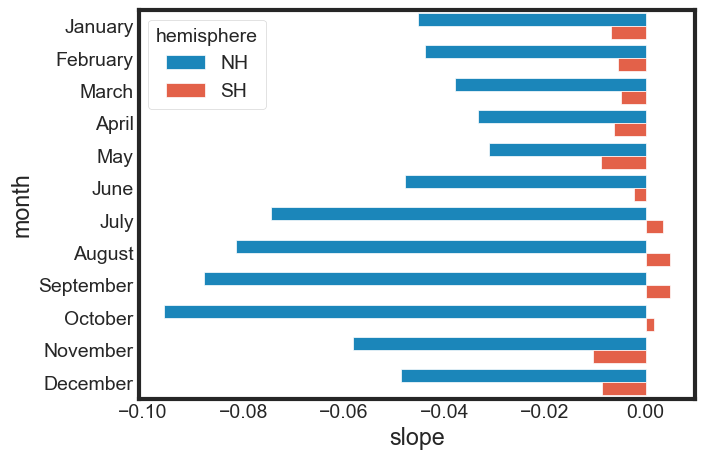

In [218]:
sns.barplot(data = df_fit_params, 
            x='slope', 
            y='month', 
            hue='hemisphere', 
            orient = 'h')

<b> Discussion:</b> <br>
- For the Northern Hemisphere, the late Summer to late Fall months have the most negative slope. This suggests that the largest decline in sea ice occurs during those months.
- Sea ice decline is most rapid in October in the Northern Hemisphere.
- Sea ice decline is much more drastic in the Northern Hemisphere compare to the Southern Hemisphere.